<a href="https://colab.research.google.com/github/kyungmo90/Ubion-Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B0%B8%EB%9F%B0%EC%8B%B1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
#train과 test를 나눠줌
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("/content/drive/MyDrive/Ashopping.csv", encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from sklearn.feature_selection import SelectKBest, chi2

#데이터 지정(변수)
X= df.drop(["고객ID", "성별"], axis = 1)
Y = df["성별"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#일변량 통계기반 변수 선택
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
0,12.171897,0.000516,True,이탈여부
1,1.762308,0.184771,True,총매출액
4,0.885780,0.346949,True,1회 평균매출액
7,1.845251,0.174776,True,고객등급
8,1.259044,0.262218,True,구매유형
11,0.910350,0.340352,True,거주지역
12,2.110759,0.146716,True,고객 나이대
13,2.238886,0.135030,True,거래기간
14,5.028139,0.025252,True,할인민감여부
18,1.079088,0.299261,True,평균 구매주기


In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#일변량 통계기반 변수 선택
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")
#n_estimators: 트리 갯수, random_state: 시작점,  threshold: 기준점

selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
1,총매출액,True
3,방문빈도,True
4,1회 평균매출액,True
5,할인권 사용 횟수,True
6,총 할인 금액,True
10,구매카테고리수,True
11,거주지역,True
13,거래기간,True
17,Monetary,True
18,평균 구매주기,True


In [7]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_under))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 135, 1: 135})


In [8]:
#오버 샘플링
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_over))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 565, 1: 565})


In [9]:
import seaborn as sns
import numpy as np

In [10]:
df["1회 평균매출액"].describe()

count    1.000000e+03
mean     3.521024e+05
std      3.124636e+05
min      2.708200e+04
25%      1.631242e+05
50%      2.582080e+05
75%      4.268310e+05
max      2.798500e+06
Name: 1회 평균매출액, dtype: float64

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [12]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_

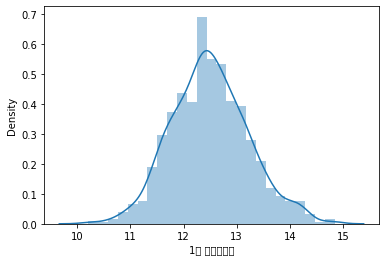

In [13]:
df["1회 평균매출액"] = np.log1p(df["1회 평균매출액"])

sns.distplot(df["1회 평균매출액"])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num=['총매출액', '할인권 사용 횟수', '총 할인 금액', '구매카테고리수', 'Frequency', 'Monetary']
cg = ['구매금액대', '고객등급', '구매유형', '클레임접수여부', '거주지역','성별', '고객 나이대']

X = df[df.성별 ==0][num+cg] #독립변수
Y = df[df.성별 ==0]["1회 평균매출액"] #종속변수

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.34611594  0.36755538  0.65476588  1.72119076  0.4576369   1.21328558
  1.          0.          0.          1.          0.          0.
  1.          0.          0.          1.          0.          0.
  0.          0.          1.          0.          0.          0.
  1.          0.          0.          1.          0.          0.
  0.        ]


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("train R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

predict value
 [11.67973403 12.45031787 12.29712367 12.34511169 12.03640746 12.23644457
 12.57114472 12.53746174 12.10853695 12.70713967 12.4534667  12.50307995
 12.30938261 12.63642888 12.33059787 12.0958641  12.54423789 12.60143677
 12.46037904 12.37584076 13.04273885 12.30777022 13.44135411 12.35352793
 12.79634181 12.8133252  12.11379985 12.51906465 12.17041589 11.89812766
 12.09536003 11.06243433 12.69485416 12.80386615 12.39883498 12.44144485
 11.65680925 11.93576094 12.22379345 12.07602853 12.6611608  12.90680819
 12.0787743  12.98162942 12.61225886 12.46714741 12.47093112 12.64984027
 11.57056211 13.11984923 12.71465257 12.69514612 12.36993317 12.84991571
 12.46294292 12.79881018 12.55720238 11.41368153 12.4399777  11.61905414
 14.01653536 11.89318901 12.87109988 12.10572347 12.39472922 13.1835452
 12.55856665 12.68854062 12.34266    13.29655738 12.99103426 12.44395563
 13.01879339 12.84599809 12.99456332 13.04847382 12.35464888 12.09701178
 12.35252733 12.33122935 12.58445044 

In [16]:
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 12.597
가중치(beta) [ 0.216 -0.01   0.065 -0.039 -0.364 -0.012 -0.17  -0.074  0.244 -0.135
  0.135 -0.04   0.012 -0.041  0.069 -0.001  0.001  0.678 -0.171 -0.151
 -0.092 -0.127 -0.101 -0.036  0.    -0.127 -0.043  0.034  0.088  0.139
 -0.091]


In [17]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()
Y_test_df = pd.DataFrame(Y_test_df["1회 평균매출액"])
Y_test_df

,1회 평균매출액
0,10.795752
1,12.341591
2,12.509475
3,11.823156
4,12.897739
...,...
239,13.651062
240,12.334079
241,11.696546
242,12.625572


In [18]:
Y_pred_df = pd.DataFrame(Y_pred)
Y_pred_df

,0
0,11.679734
1,12.450318
2,12.297124
3,12.345112
4,12.036407
...,...
239,12.638948
240,12.830956
241,12.433800
242,13.011958


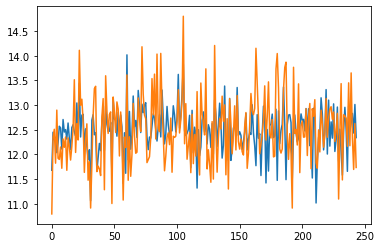

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred_df)
plt.plot(Y_test_df)

In [ ]:


sns.distplot(df['sepal_length'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_

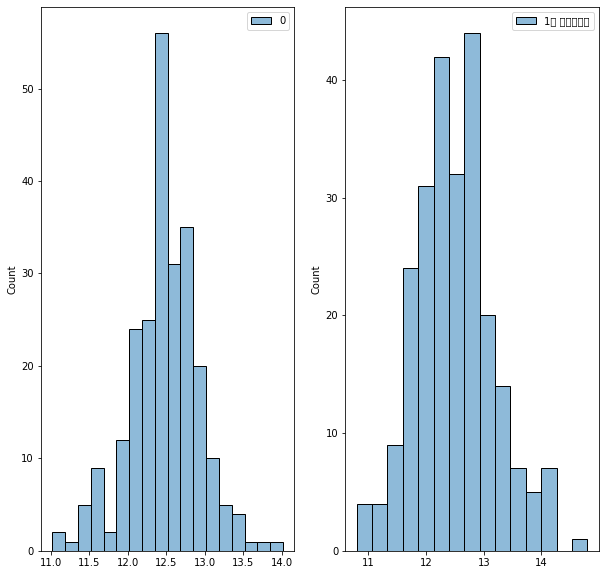

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10,10))
sns.histplot(Y_pred_df, ax=ax[0])
sns.histplot(Y_test_df, ax=ax[1])

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

star_df = pd.DataFrame[Y_pred_df]

TypeError: ignored